# Descriptive Statistics

Examine the distribution of data in regards to number of people per image in the model pictures.

In [1]:
# Import the necessary packages
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io, filters, measure
from glob import glob

In [2]:
# Find location of image files and labeled images
labels = glob('data/processed/dots/with_people/splits/*.png')

In [3]:
# Save people counts per image
people_counts = [] # empty list to add to
for label in labels: # for each label in the list of files
    label_temp = io.imread(label, as_gray=True) # read in as gray
    labels_temp = measure.label(label_temp) # measure the number of values
    label_flatten = labels_temp.max() # find max value (# of people)
    people_counts.append(label_flatten) # append the value into the list

In [4]:
# Convert to dataframe
people_counts = pd.DataFrame({'people':people_counts})

In [5]:
# Count the number of times each number of people is present in the 
# dataset
people_table = people_counts.people.value_counts().reset_index()
people_table.columns = ['People', 'Frequency']

# Noticed that 10 people are not present in any image, so for plotting
# purposes, I will add a row for 10 people with a frequency of 0
people_table = people_table.append({'People': 10, 'Frequency':0}, ignore_index=True)

# Resort the table
people_table = people_table.sort_values('People', ascending=True)

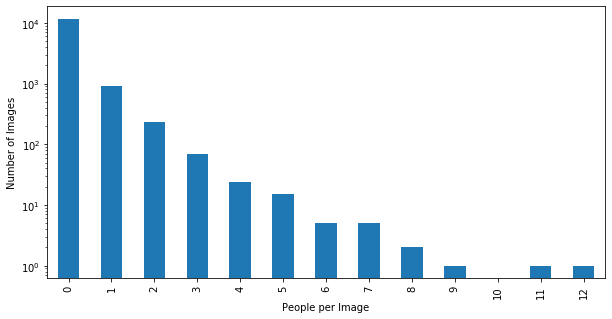

In [6]:
# Plot the table to see the distribution
people_table.plot(x='People', y='Frequency', kind='bar', legend=False, figsize=(10,5))
plt.yscale('log')
plt.xlabel('People per Image')
plt.ylabel('Number of Images')
plt.show()

In [7]:
people_table

,People,Frequency
0,0,11768
1,1,897
2,2,236
3,3,70
4,4,24
5,5,15
7,6,5
6,7,5
8,8,2
11,9,1


There are many instances in which 0 people are in the image, even though we have already used images that had people in them before we cut each image into 25 smaller images. Maybe we should focus more on using full images, because it would train the model a little bit better. 

Below we will explore the dataset of full images and see how these compare.

In [8]:
# Find location of image files and labeled images
labels = glob('data/processed/dots/with_people/*.png')

In [9]:
# Save people counts per image
people_counts = [] # empty list to add to
for label in labels: # for each label in the list of files
    label_temp = io.imread(label, as_gray=True) # read in as gray
    labels_temp = measure.label(label_temp) # measure the number of values
    label_flatten = labels_temp.max() # find max value (# of people)
    people_counts.append(label_flatten) # append the value into the list

In [10]:
# Convert to dataframe
people_counts = pd.DataFrame({'people':people_counts})

In [11]:
# Count the number of times each number of people is present in the 
# dataset and sort accordingly
people_table = people_counts.people.value_counts().reset_index()
people_table.columns = ['People', 'Frequency']

# Resort the table
people_table = people_table.sort_values('People', ascending=True)

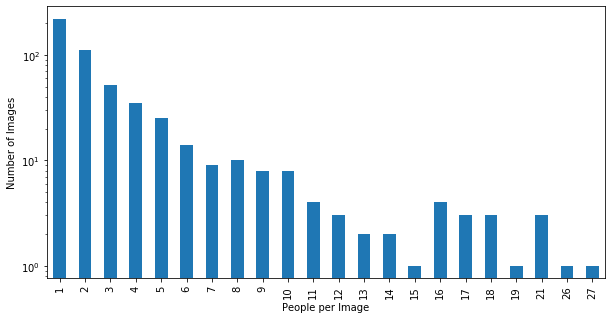

In [12]:
# Plot the table to see the distribution
people_table.plot(x='People', y='Frequency', kind='bar', legend=False, figsize=(10,5))
plt.yscale('log')
plt.xlabel('People per Image')
plt.ylabel('Number of Images')
plt.show()